In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
bigmart=pd.read_csv("D:/analytic vidya/Linear_Regression/linear regression/train_cleaned.csv")

In [34]:
bigmart.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [35]:
X=bigmart.drop(['Item_Outlet_Sales'], axis=1)
y=bigmart['Item_Outlet_Sales']

In [36]:
X.shape, y.shape

((8523, 45), (8523,))

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y, random_state=56)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [45]:
lr=LinearRegression()

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
train_pred=lr.predict(x_train)
k=mae(train_pred, y_train)
print('mean absolute error', k)

mean absolute error 821.4206146753681


In [47]:
test_pred=lr.predict(x_test)
k=mae(test_pred, y_test)
print('mean absolute error', k)

mean absolute error 875.2688982985245


In [48]:
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

Text(0.5, 1.0, 'coefficient plot')

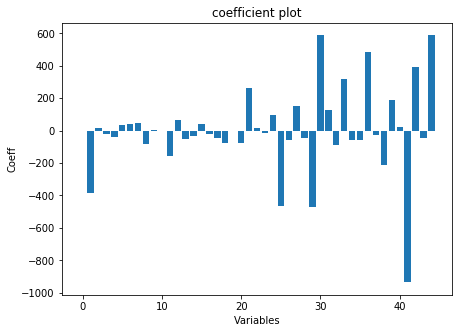

In [51]:
plt.figure(figsize=(7,5), facecolor='w', edgecolor='b')
x=range(len(x_train.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coeff')
plt.title('coefficient plot')

In [58]:
# Residuals
residuals=pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : test_pred
})
residuals['residuals']=residuals['fitted values']-residuals['predicted values']

residuals.head()

,fitted values,predicted values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


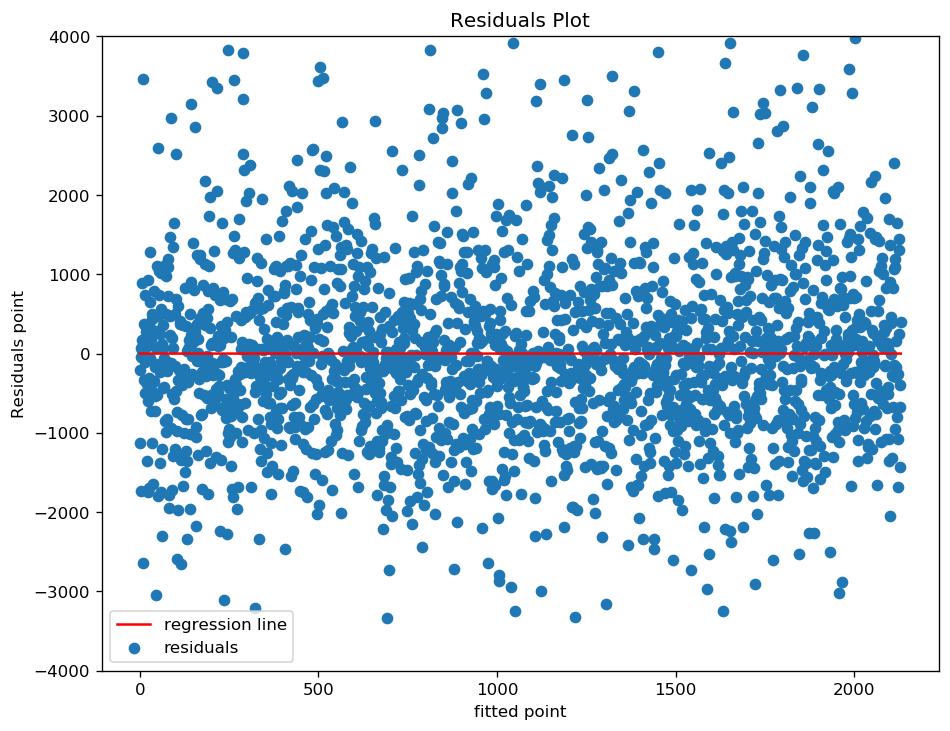

In [64]:
plt.figure(figsize=(9,7), dpi=120, facecolor='w', edgecolor='b')
f=range(0,2131)
k=[0 for i in range(0,2131)]
plt.scatter(f, residuals.residuals[:], label='residuals')
plt.plot(f, k, color='red', label='regression line')
plt.xlabel('fitted point')
plt.ylabel('Residuals point')
plt.title('Residuals Plot')
plt.ylim(-4000, 4000)
plt.legend()

Text(0.5, 1.0, 'Distribution of Error Terms')

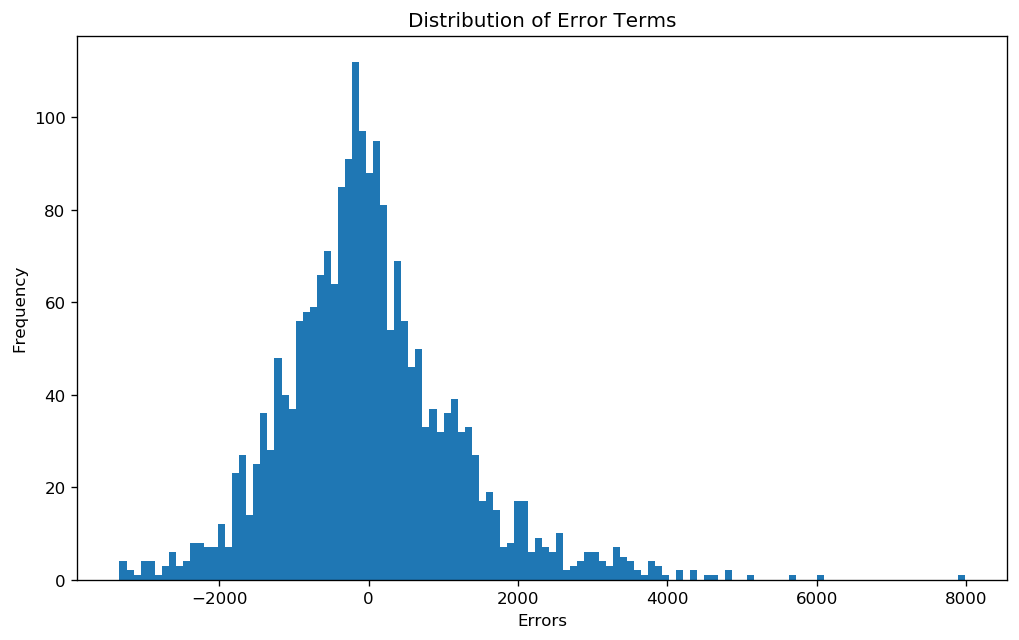

In [65]:
plt.figure(figsize=(10,6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins=120)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')

In [66]:
from statsmodels.graphics.gofplots import qqplot

Text(0.5, 1.0, 'QQ plot')

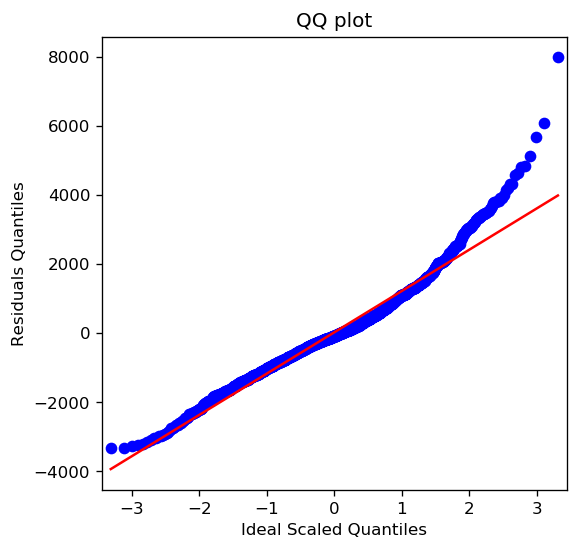

In [69]:
figure, ax = plt.subplots(figsize=(5,5), dpi=120)
qqplot(residuals.residuals, line='s', ax=ax)
plt.ylabel('Residuals Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('QQ plot')

In [70]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [72]:
VIF=pd.Series([variance_inflation_factor(bigmart.values, i) for i in range(bigmart.shape[1])], index=bigmart.columns)

VIF

E:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

In [74]:
lr=LinearRegression(normalize=True)

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [75]:
train_pred=lr.predict(x_train)
k=mae(train_pred, y_train)
print("Train Mean Absolute Error", k)

Train Mean Absolute Error 822.467098060075


In [76]:
test_pred=lr.predict(x_test)
k=mae(test_pred, y_test)
print("Test Mean Absolute Error", k)

Test Mean Absolute Error 876.2396900985453


Text(0.5, 1.0, 'Normalized Coefficient plot')

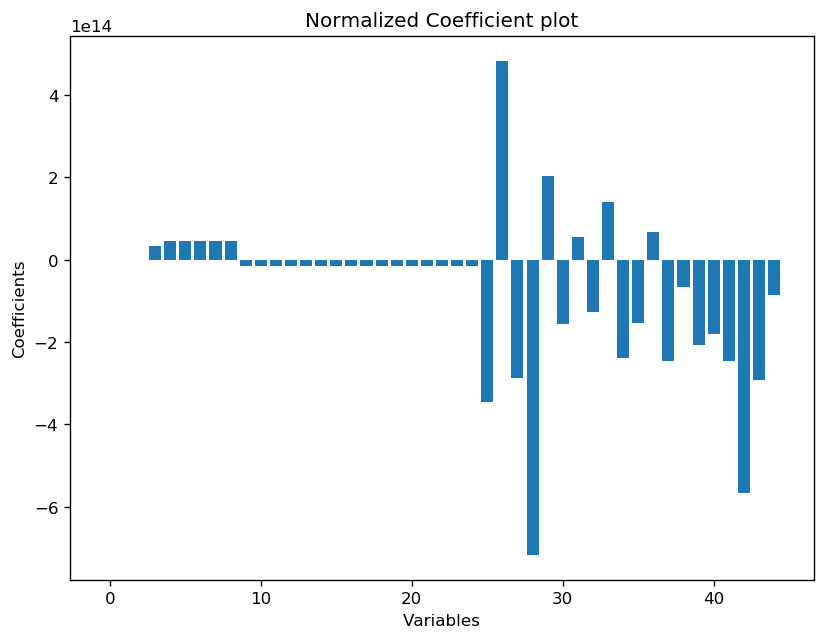

In [78]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

#### Creating new subsets of data

In [80]:
#seperating independent and dependent variables
x = bigmart.drop(['Item_Outlet_Sales'], axis=1)
y = bigmart['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [81]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,Item_Weight,2.126864e-01
1,Item_Visibility,-3.853014e+02
2,Item_MRP,1.549768e+01
3,Outlet_Establishment_Year,3.211367e+13
4,Item_Fat_Content_LF,4.564857e+13


In [82]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [84]:
subset = bigmart[sig_var['Variable'].values]
subset.head()

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT013,Outlet_Identifier_OUT019,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Size_Medium
0,249.8092,1999,0,1,0,0,0,0,0,0,0,1
1,48.2692,2009,0,0,1,0,0,0,0,0,0,1
2,141.6180,1999,0,1,0,0,0,0,0,0,0,1
3,182.0950,1998,0,0,1,0,0,0,0,0,0,0
4,53.8614,1987,0,1,0,0,0,1,0,0,0,0


In [85]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [92]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error as mae

In [95]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LinearRegression(normalize = True)

# Fitting the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [99]:
# Predicting over the Train Set and calculating error
train_pred = lr.predict(x_train)
k = mae(train_pred, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 822.467098060075


In [100]:
# Predicting over the Test Set and calculating error
test_pred = lr.predict(x_test)
k = mae(test_pred, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     876.2396900985453


Text(0.5, 1.0, 'Normalized Coefficient plot')

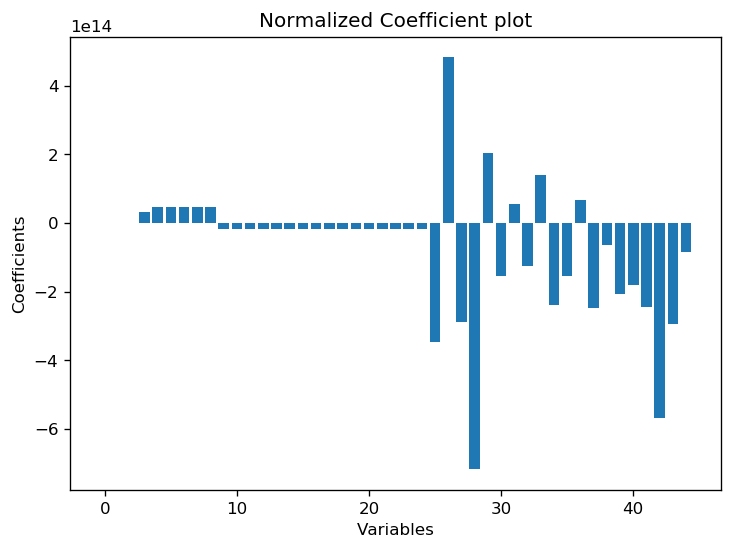

In [102]:
plt.figure(figsize=(7, 5), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')